In [2]:
%matplotlib notebook
#%matplotlib inline # notebook, qt, wx, gtk, osx, tk, empty uses default
import numpy as np
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt

ap = argparse.ArgumentParser()

<IPython.core.display.Javascript object>


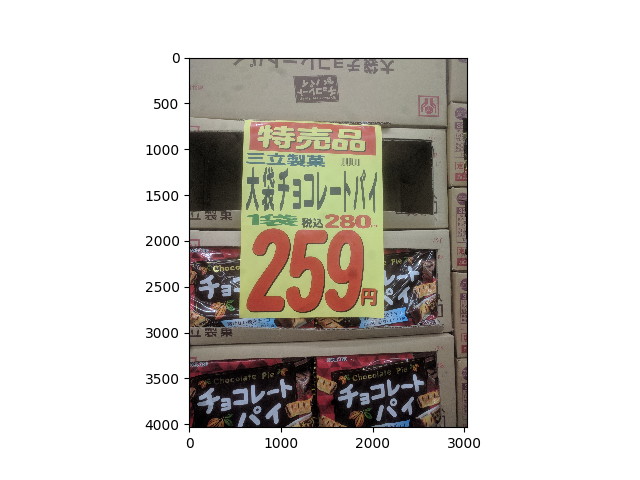

In [4]:
image = cv2.imread("IMG_20181216_092615.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

image = cv2.imread("IMG_0699.jpg")
img, contours, hierarchy = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(img)

In [597]:
def distancePoint2Line(x1, y1, x2, y2, x, y):
    return abs((y2 - y1)*x - (x2 - x1)*y + (x2*y1) - (x1*y2)) / np.sqrt((y2-y1)**2 + (x2-x1)**2)

def lineLength(x1, y1, x2, y2): 
    return np.sqrt((y2-y1)**2 + (x2-x1)**2)
    
def processImage(imagePath): 
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    complexity = int(np.sum(image) / 500 / 500 * 10 - 50)
    print("complexity: {}".format(complexity))
    ret,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    minLineLength = 100
    maxLineGap = 10
    lines = cv2.HoughLinesP(thresh,1,np.pi/180,complexity-80,minLineLength,maxLineGap)
    imgContours = np.zeros((500, 500, 3), np.uint8)
    if (lines is not None):
        print(len(lines))
        for line in lines: 
            for x1,y1,x2,y2 in line:
                if distancePoint2Line(x1, y1, x2, y2, 255, 255) > 50 or lineLength(x1, y1, x2, y2) > 50: 
                    cv2.line(imgContours,(x1,y1),(x2,y2),(255, 0, 0),1)
    imgContours = cv2.cvtColor(imgContours, cv2.COLOR_RGB2GRAY)
    
    return np.hstack((image, thresh, imgContours))

In [598]:
def polarDistance(rho, theta, x, y):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    #return abs(a*x + b*y + rho) / (np.sqrt(a**2 + b**2)) 
    #return rho1*rho1 + rho2*rho2 - 2*rho1*rho2*np.cos(theta2-theta1)
    return abs((y2 - y1)*x - (x2 - x1)*y + (x2*y1) - (x1*y2)) / np.sqrt((y2-y1)**2 + (x2-x1)**2)

def drawPolarLine(image, rho, theta):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

print(polarDistance(np.sqrt(250**2 + 250**2), np.pi/4, 250, 250))

0.0


In [599]:
def processImageWithHoughLine(imagePath):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    complexity = int(np.sum(image) / 500 / 500 * 10 - 50)
    print("complexity: {}".format(complexity))
    ret,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    lines = cv2.HoughLines(thresh,1,np.pi/180,max(complexity, 100))
    print(len(lines))
    print(lines.shape)
    imgContours = np.zeros((500, 500, 3), np.uint8)
    for line in lines:
        for rho,theta in line:
            d1 = polarDistance(rho, theta, 250, 250)
            #print(d1)
            if (d1 > 50):
                drawPolarLine(imgContours, rho, theta)
    imgContours = cv2.cvtColor(imgContours, cv2.COLOR_RGB2GRAY)
    return np.hstack((image, thresh, imgContours))

complexity: 148
165
complexity: 35
110
complexity: 125
157


<IPython.core.display.Javascript object>


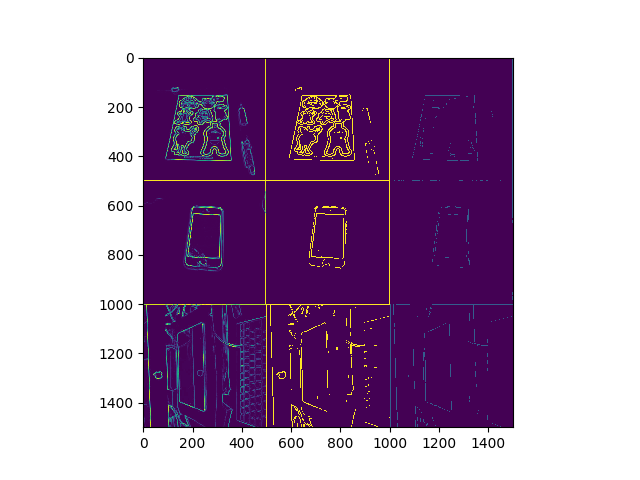

In [600]:
plt.imshow(np.vstack((processImage("IMG_0699.jpg")
                      , processImage("IMG_0126.jpg")
                     , processImage("AC8AC781-235D-44BE-8368-688B6228C758-354-000000054E31D012.jpg"))))
